In [714]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
import sklearn
import xgboost

pd.set_option('display.max_columns', None)

In [772]:
hp_train = pd.read_csv("house_prices_train.csv")
hp_test = pd.read_csv("house_prices_test.csv")
hp_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [716]:
hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [773]:
def preprocessing(df):
    df["Alley"] = np.where(df.Alley.isna(), "Not alley access", df.Alley)
    df["FireplaceQu"] = np.where(df.Fireplaces == 0, "No Fireplace", df.FireplaceQu)
    df["PoolQC"] = np.where(df.PoolArea == 0, "No Pool", df.PoolQC)
    df["Fence"] = np.where(df.Fence.isna(), "No Fence", df.Fence)
    df["BsmtQual"] = np.where(df.BsmtQual.isna(), "No Basement", df.BsmtQual)
    df["BsmtCond"] = np.where(df.BsmtCond.isna(), "No Basement", df.BsmtCond)
    df["BsmtExposure"] = np.where(df.BsmtExposure.isna(), "No Basement", df.BsmtExposure)
    df["BsmtFinType1"] = np.where(df.BsmtFinType1.isna(), "No Basement", df.BsmtFinType1)
    df["BsmtFinType2"] = np.where(df.BsmtFinType2.isna(), "No Basement", df.BsmtFinType2)
    df["GarageType"] = np.where(df.GarageType.isna(), "No Garage", df.GarageType)
    df["GarageYrBlt"] = np.where(df.GarageYrBlt.isna(), 0, df.GarageYrBlt)
    df["GarageQual"] = np.where(df.GarageQual.isna(), "No Garage", df.GarageQual)
    df["GarageCond"] = np.where(df.GarageCond.isna(), "No Garage", df.GarageCond)
    df["GarageFinish"] = np.where(df.GarageFinish.isna(), "No Garage", df.GarageFinish)
    df["MiscFeature"] = np.where(df.MiscFeature.isna(), "None", df.MiscFeature)
    df["MasVnrType"] = np.where(df.MasVnrType.isna(), "None", df.MasVnrType)
    df["MasVnrArea"] = np.where(df.MasVnrArea.isna(), 0, df.MasVnrArea)
    df["HouseAge"] = df.YrSold - df.YearBuilt
    df["RemodAge"] = df.YrSold - df.YearRemodAdd
    df["YearToRemod"] = df.YearRemodAdd - df.YearBuilt
    df["GarageYrBlt"] = np.where(df.GarageYrBlt == 0, df.YearBuilt, df.GarageYrBlt)
    df = df.drop(columns = ["Id"])
    

    return df

In [774]:
hp_train = preprocessing(hp_train)

#x = hp_train.SalePrice.quantile(0.75) + (hp_train.SalePrice.quantile(0.75) - hp_train.SalePrice.quantile(0.25)) * 1.5
#hp_train = hp_train.loc[hp_train.SalePrice <= x,:]

hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [719]:
n_columns = len(hp_train.select_dtypes(exclude = "object"))

for i in hp_train.select_dtypes(include = "object").columns:
    n_columns += len(pd.unique(hp_train.loc[:,i])) - 1

n_columns

1684

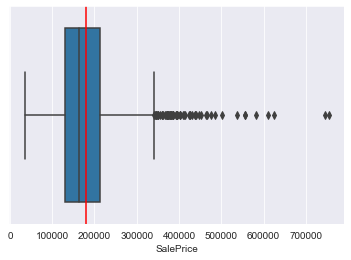

In [720]:
sns.boxplot(hp_train.SalePrice)
plt.axvline(hp_train.SalePrice.mean(), color = "red")

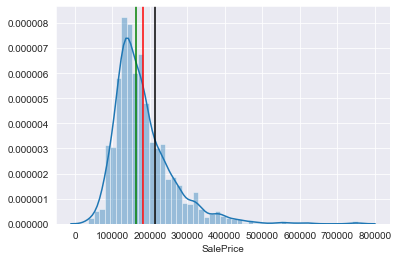

In [721]:
sns.distplot(hp_train.SalePrice)
plt.axvline(hp_train.SalePrice.median(), color = "green")
plt.axvline(hp_train.SalePrice.mean(), color = "red")
plt.axvline(hp_train.SalePrice.quantile(0.75), color = "black")

In [722]:
import scipy
scipy.stats.skew(hp_train.SalePrice)

1.880940746034036

In [723]:
np.mean(hp_train.SalePrice > hp_train.SalePrice.mean())

0.3835616438356164

In [724]:
x = hp_train.SalePrice.quantile(0.75) + (hp_train.SalePrice.quantile(0.75) - hp_train.SalePrice.quantile(0.25)) * 1.5

np.mean(hp_train.SalePrice > x)

0.04178082191780822

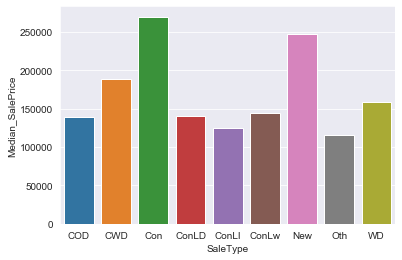

In [725]:
x = hp_train.groupby("SaleType").agg(Median_SalePrice = ("SalePrice", "median")).reset_index()
x
sns.barplot(data = x, x = "SaleType", y = "Median_SalePrice")

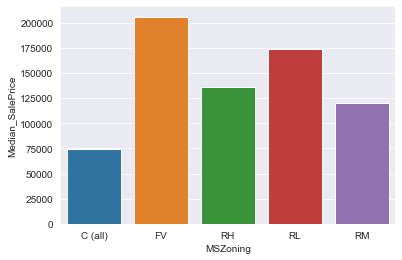

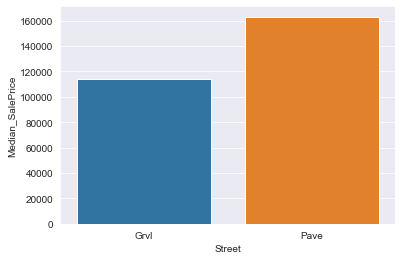

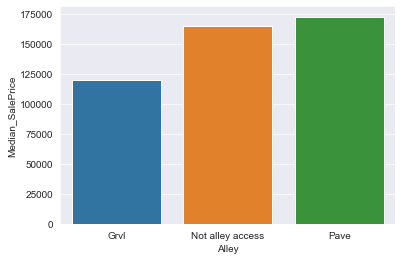

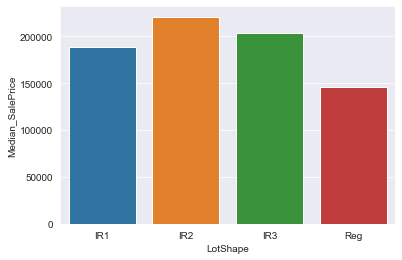

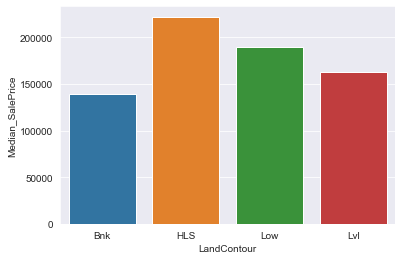

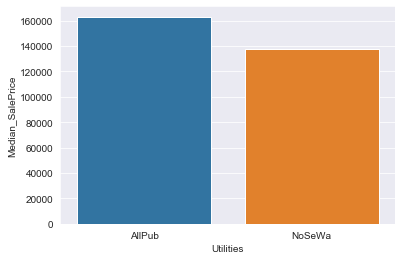

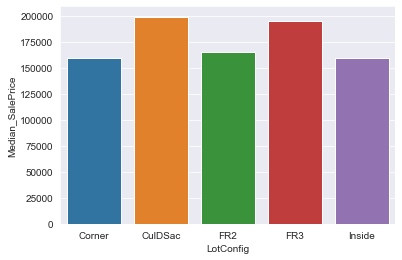

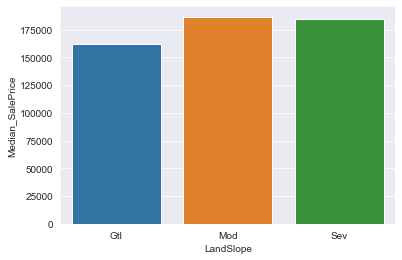

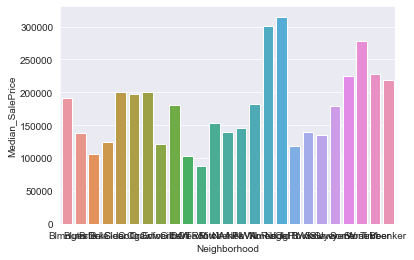

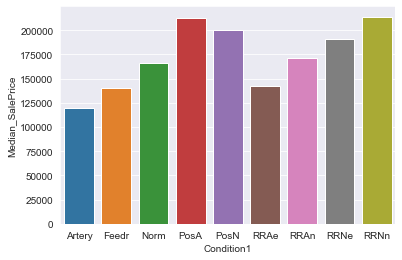

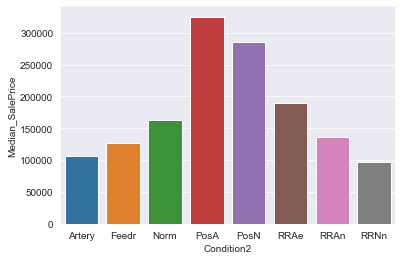

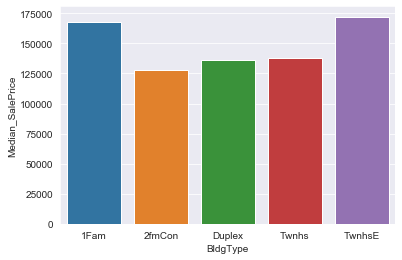

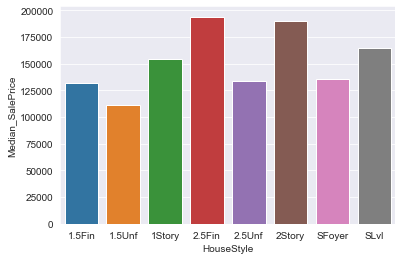

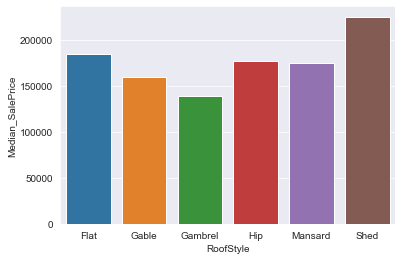

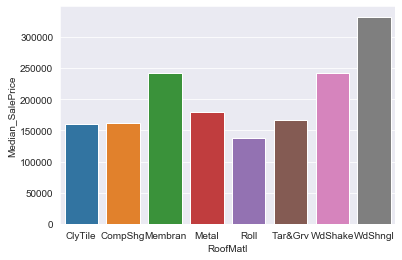

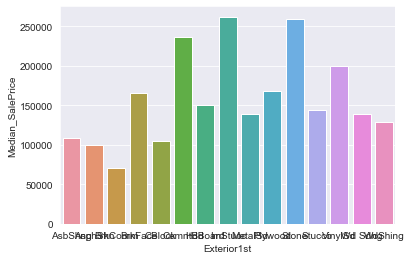

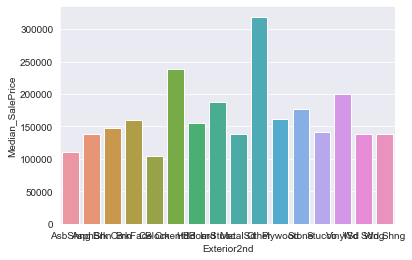

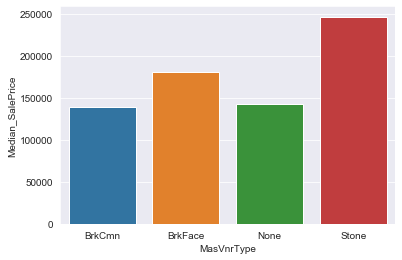

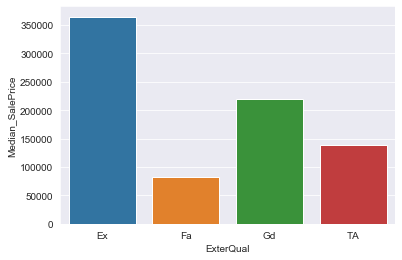

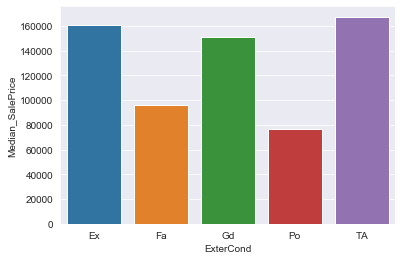

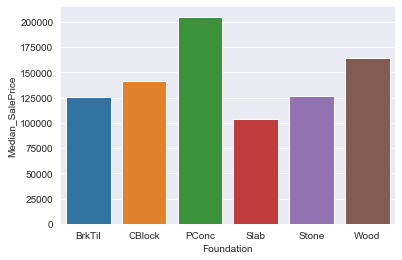

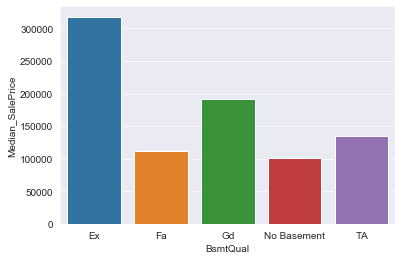

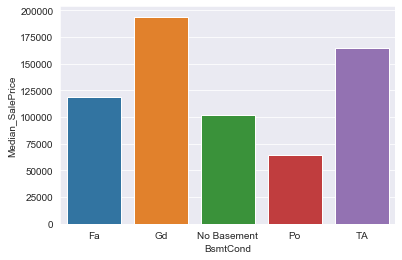

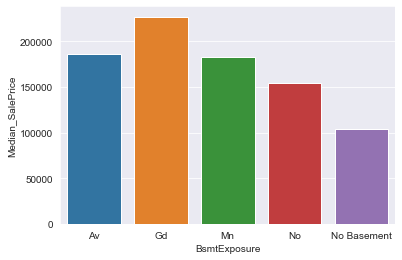

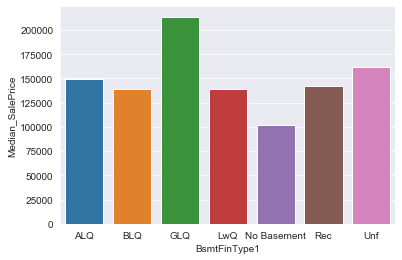

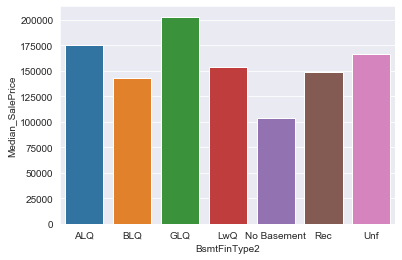

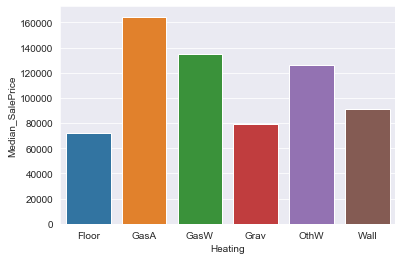

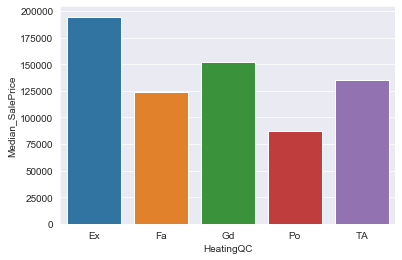

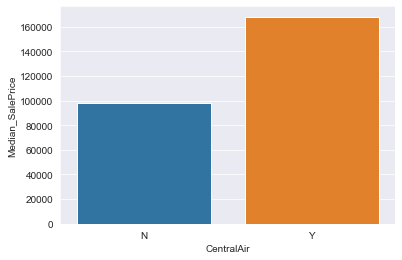

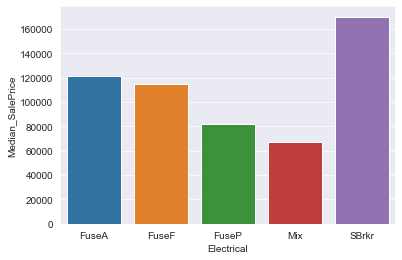

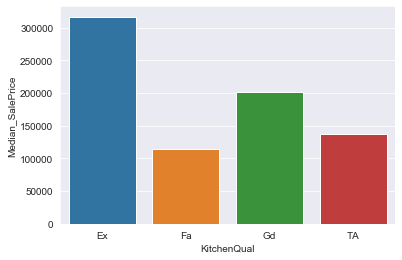

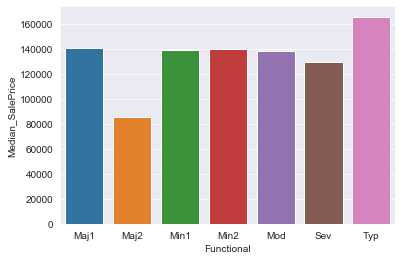

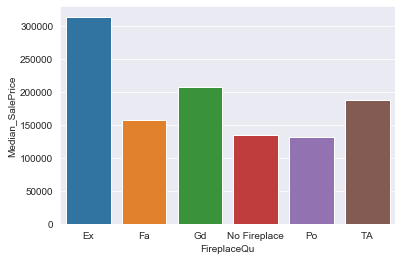

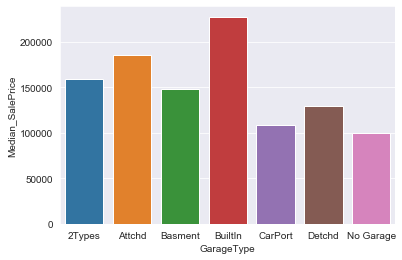

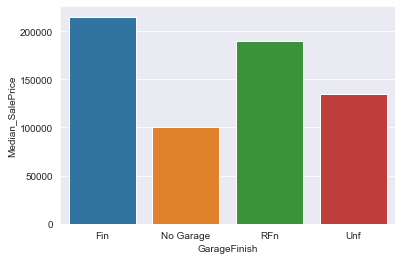

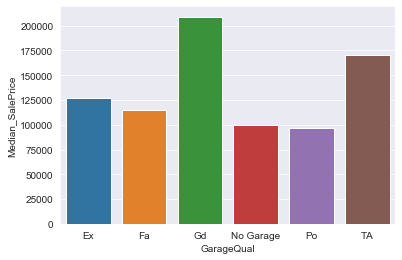

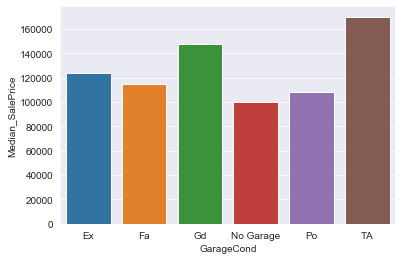

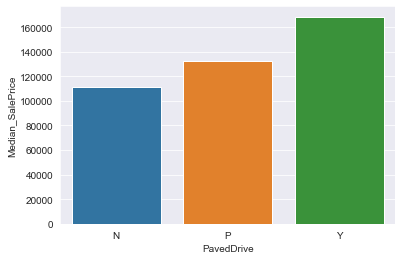

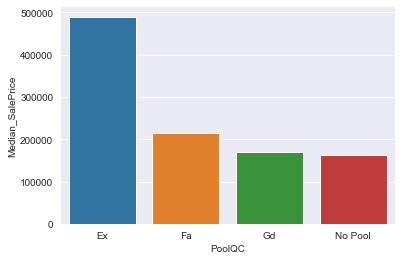

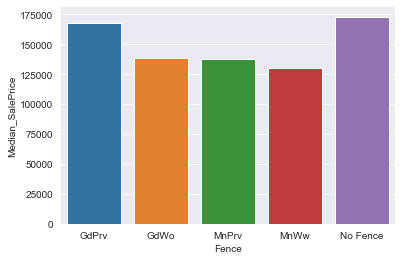

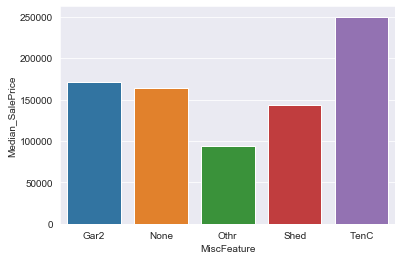

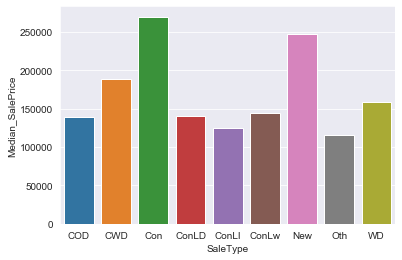

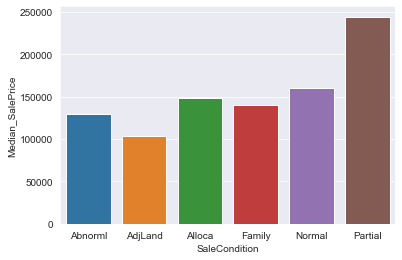

In [726]:
for i in [feature for feature in hp_train.columns if hp_train[feature].dtypes == "O"]:
    df = hp_train.groupby(i).agg(Median_SalePrice = ("SalePrice", "median")).reset_index()
    sns.barplot(data = df, x = i, y = "Median_SalePrice")
    plt.show()

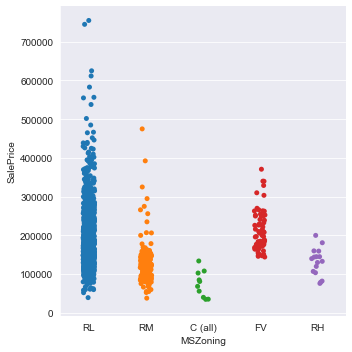

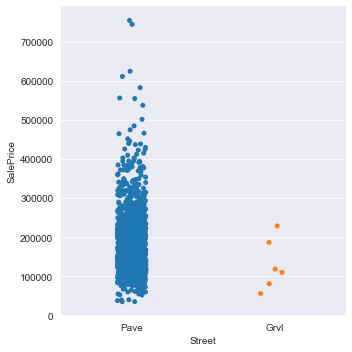

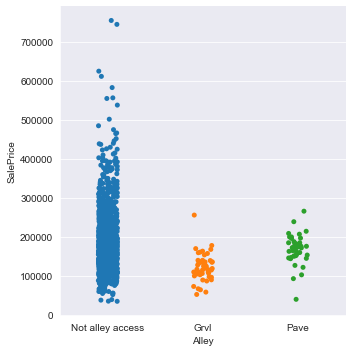

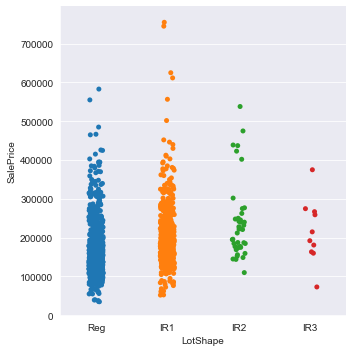

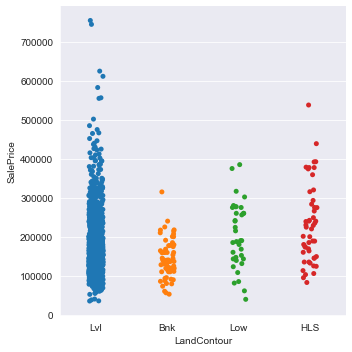

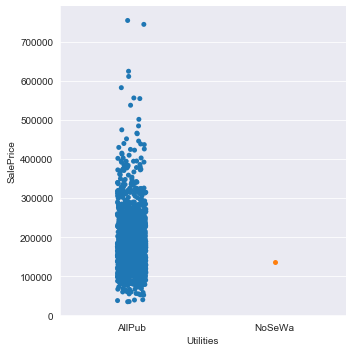

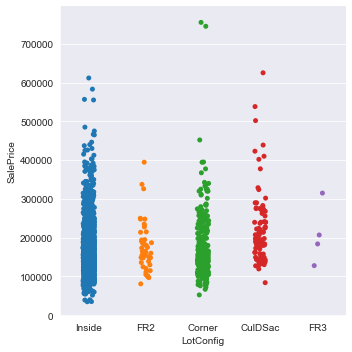

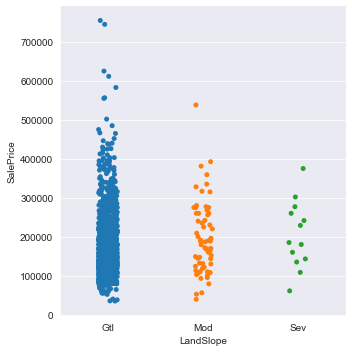

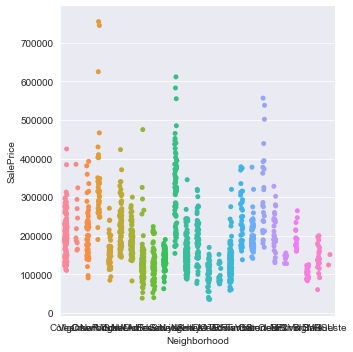

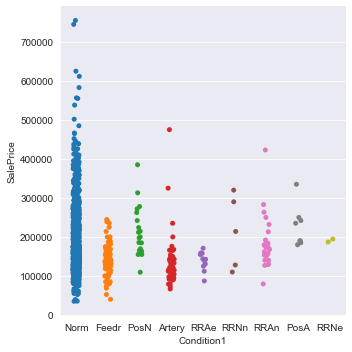

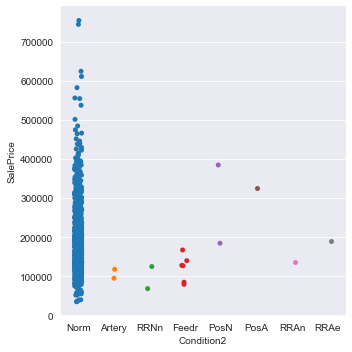

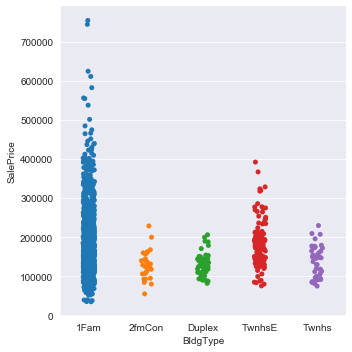

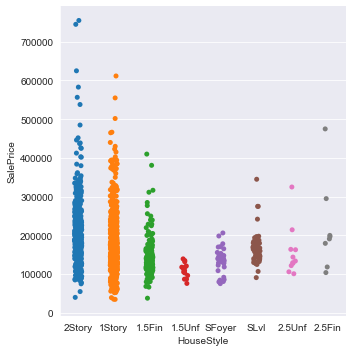

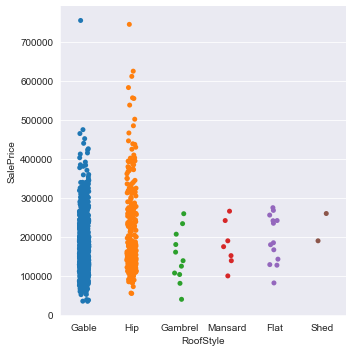

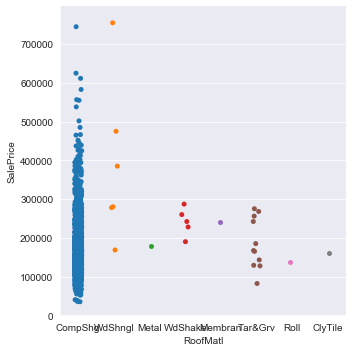

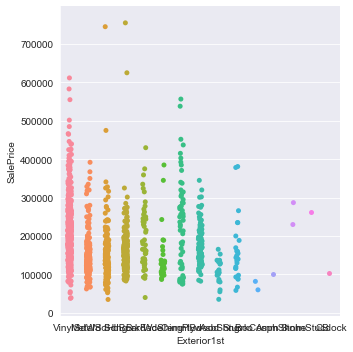

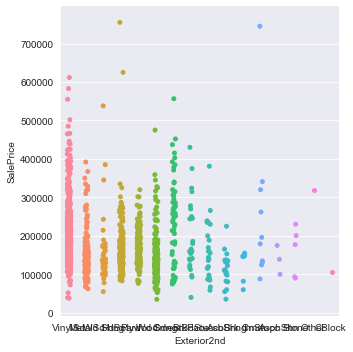

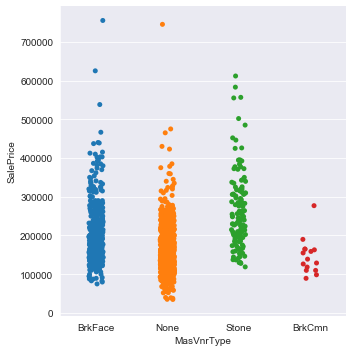

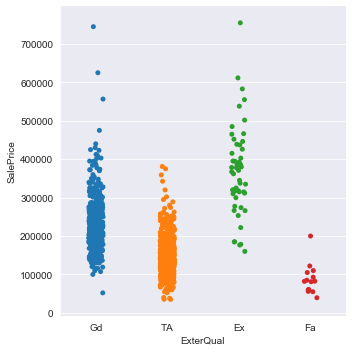

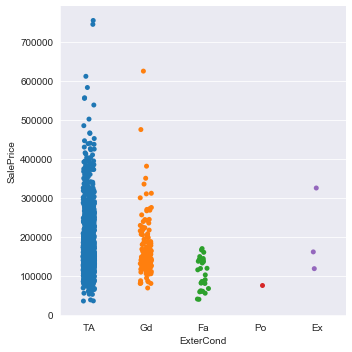

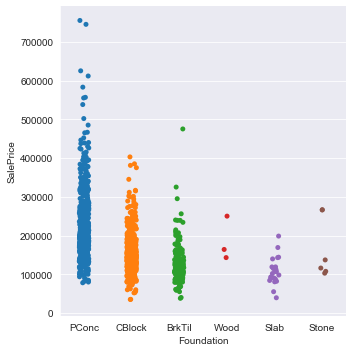

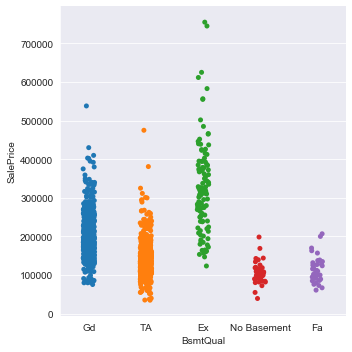

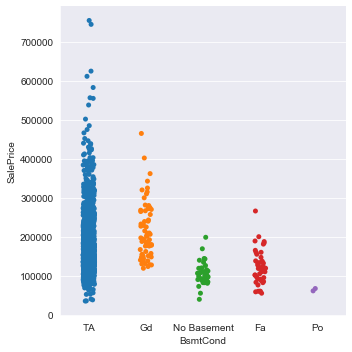

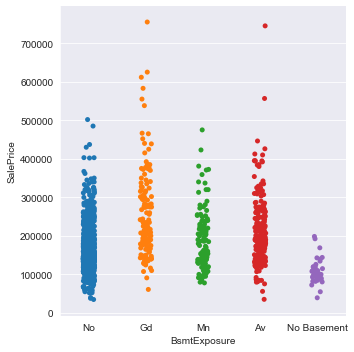

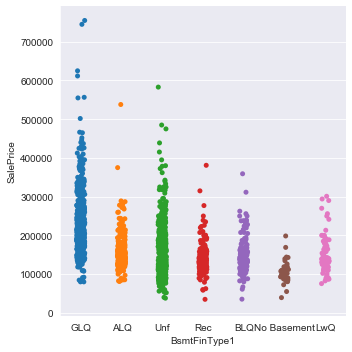

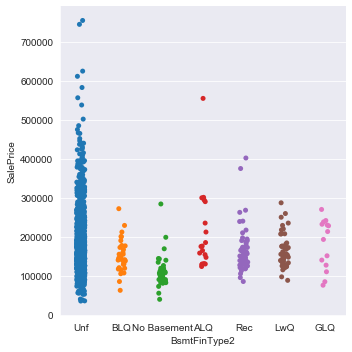

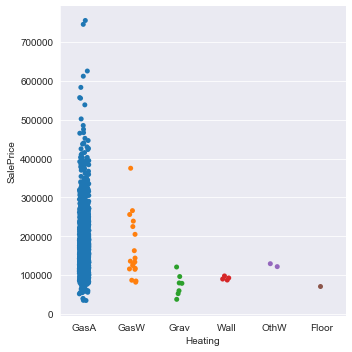

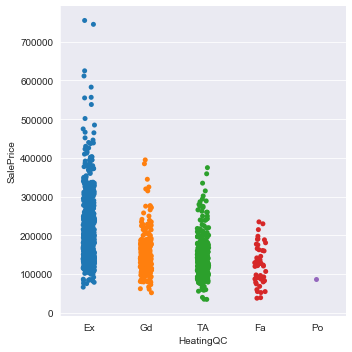

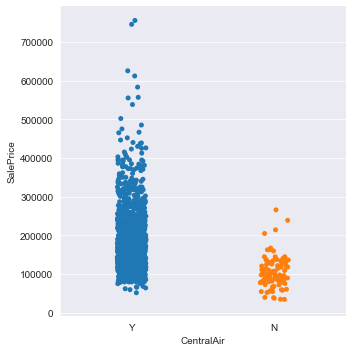

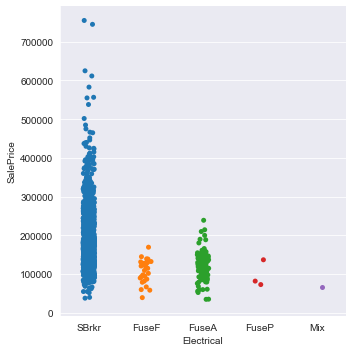

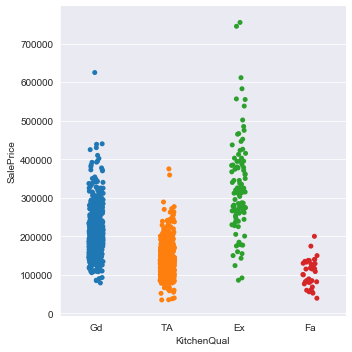

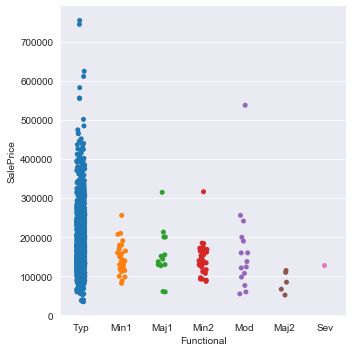

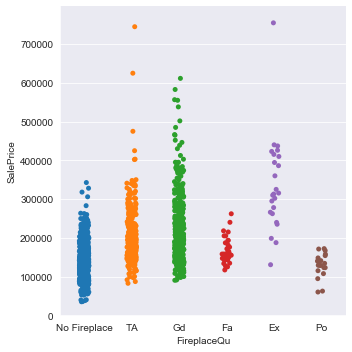

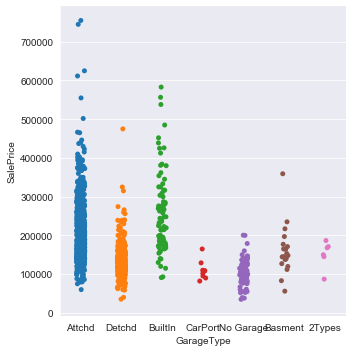

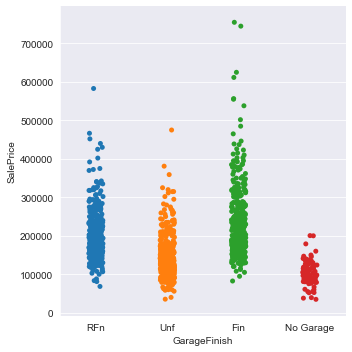

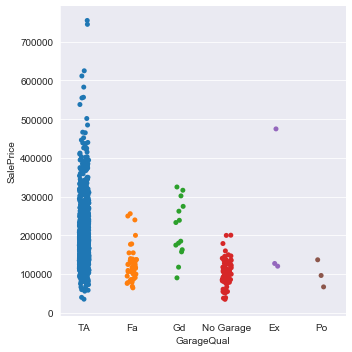

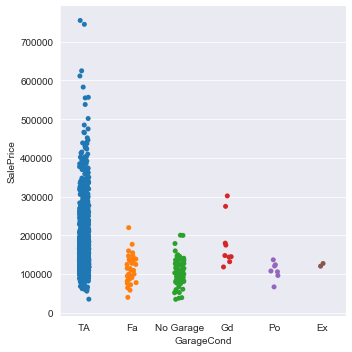

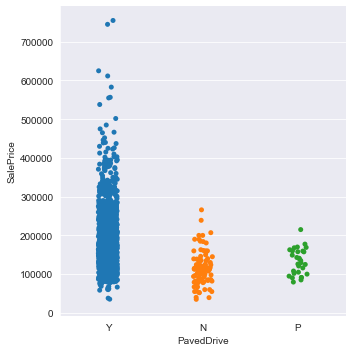

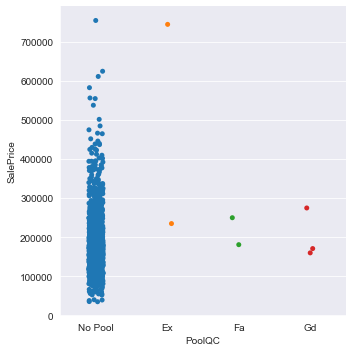

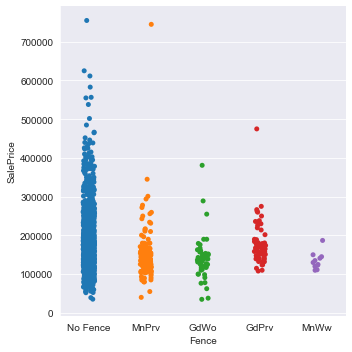

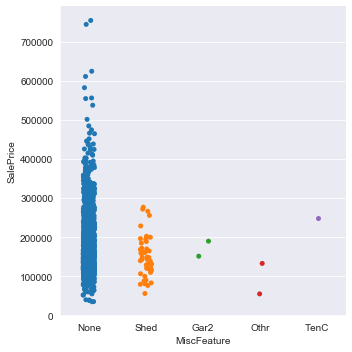

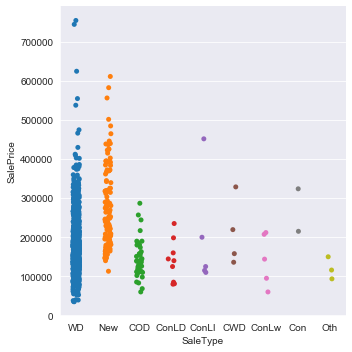

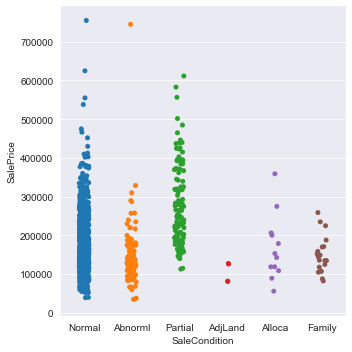

In [727]:
for i in [feature for feature in hp_train.columns if hp_train[feature].dtypes == "O"]:
    sns.catplot(data = hp_train, x = i, y = "SalePrice")
    plt.show()

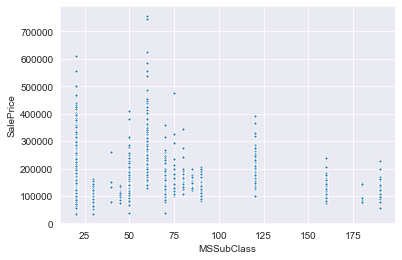

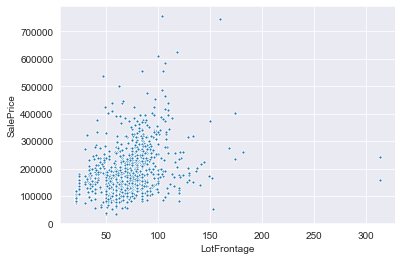

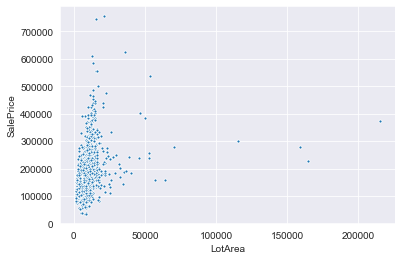

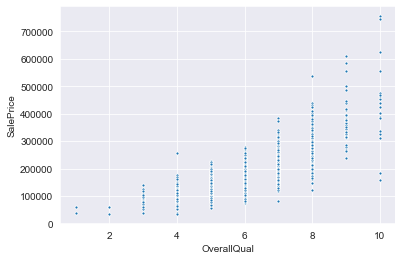

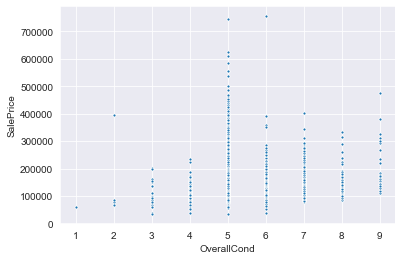

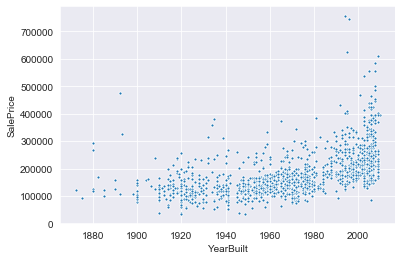

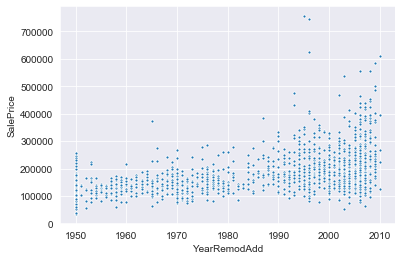

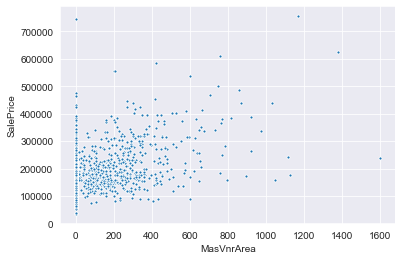

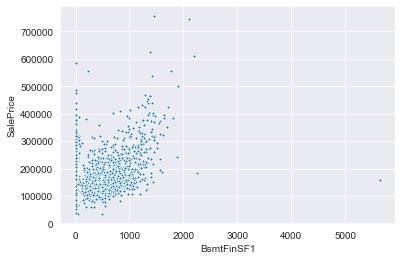

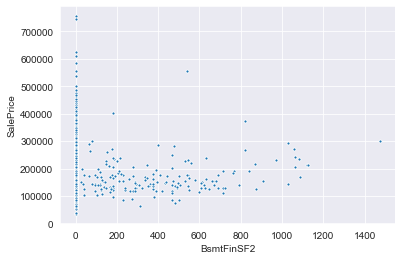

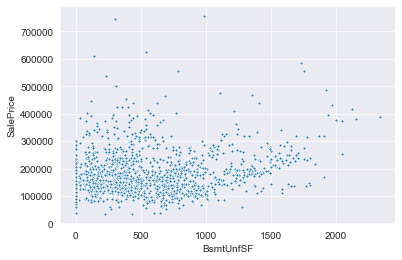

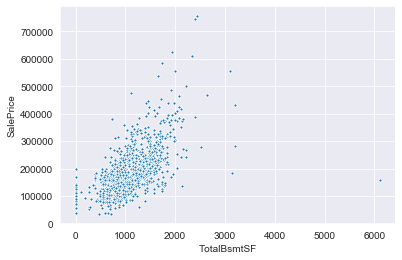

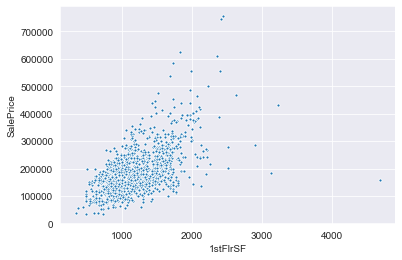

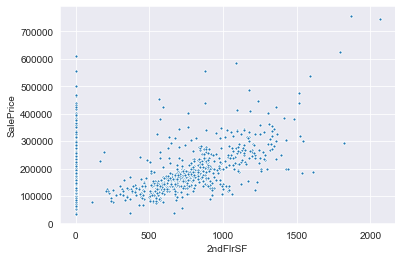

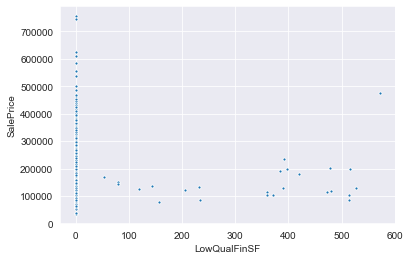

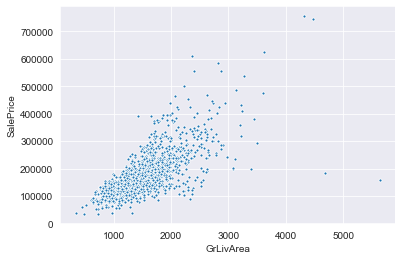

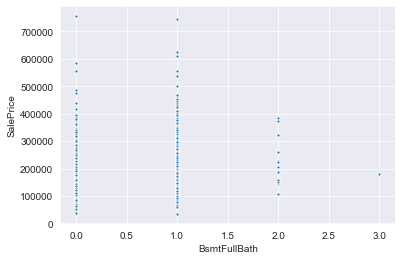

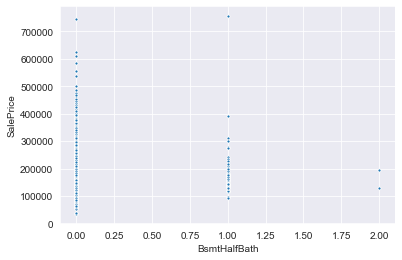

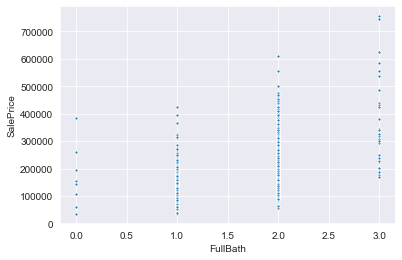

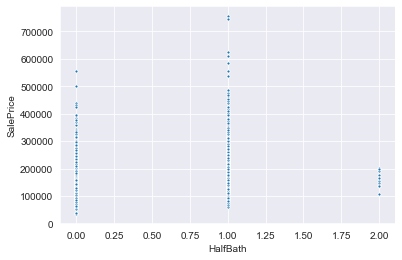

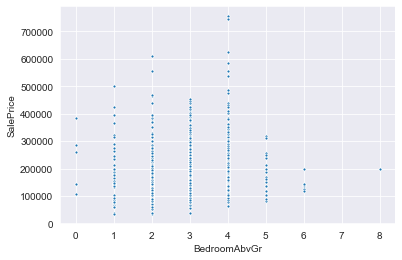

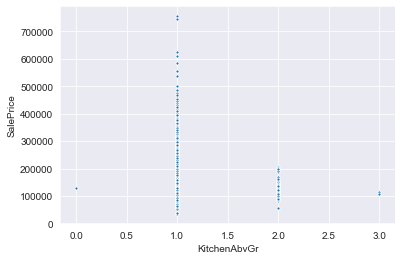

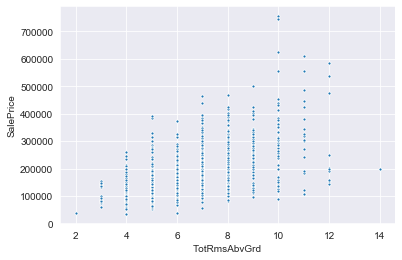

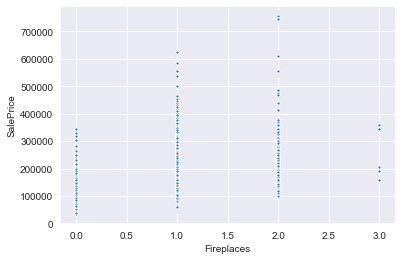

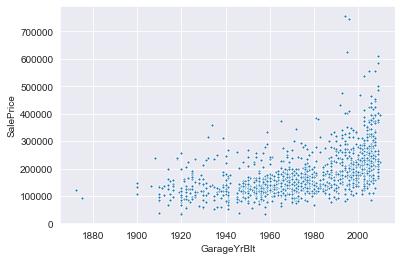

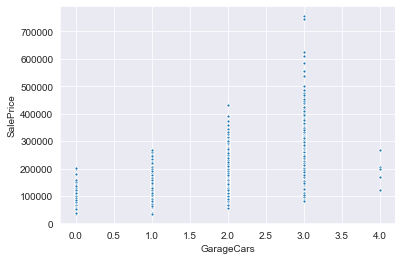

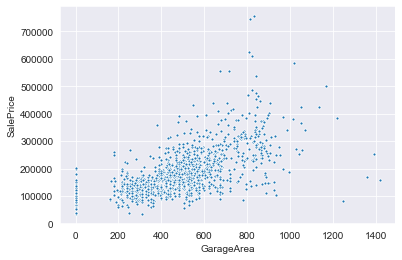

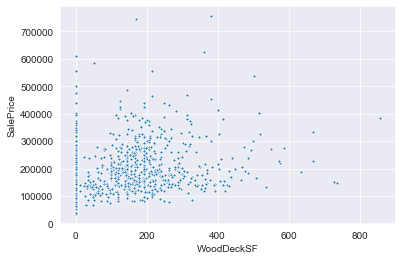

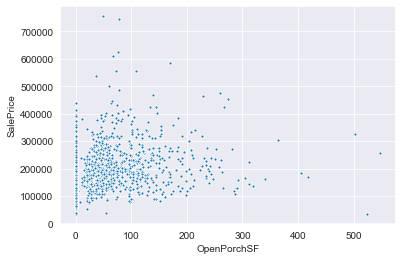

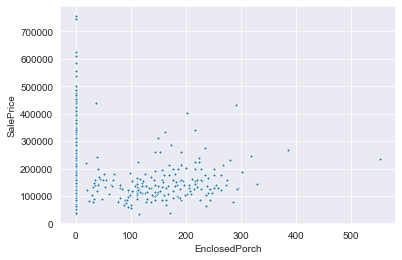

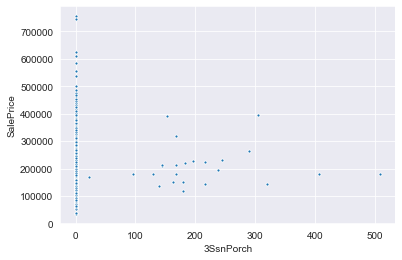

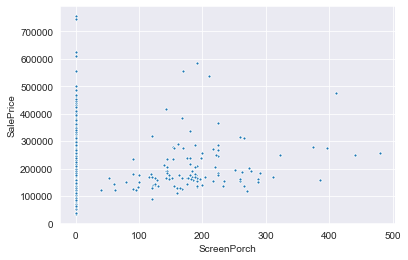

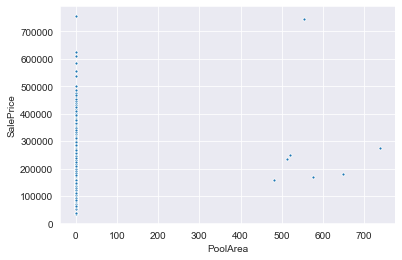

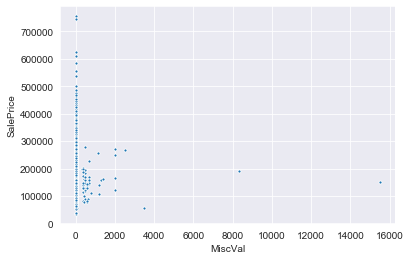

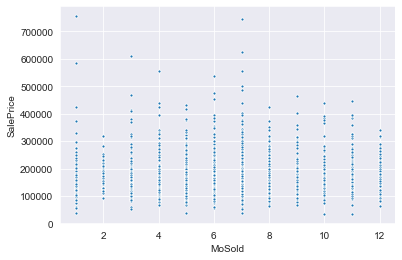

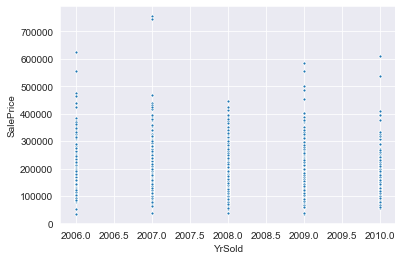

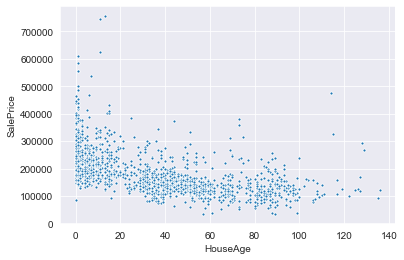

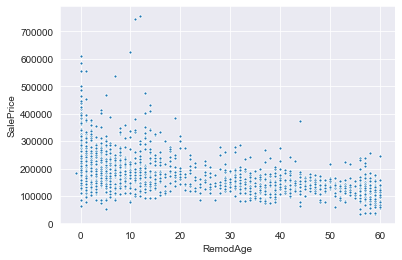

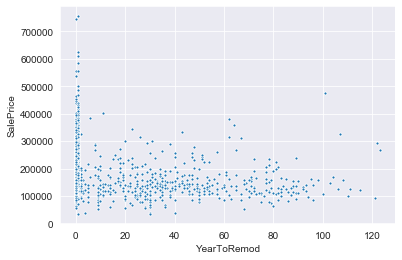

In [728]:
for i in [feature for feature in hp_train.columns if (hp_train[feature].dtypes != "O") & (feature != "SalePrice")]:
    sns.scatterplot(data = hp_train, x = i, y = "SalePrice", marker = ".")
    plt.show()

In [775]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_features = hp_train.select_dtypes(exclude = "object").columns
categorical_features = hp_train.select_dtypes(include = "object").columns

pre_numerical = SimpleImputer(strategy = "median")
pre_categorical = SimpleImputer(strategy = "most_frequent")

pre_data_transformer = ColumnTransformer(transformers = [
    ("pre_numerical", pre_numerical, numerical_features),
    ("pre_categorical", pre_categorical, categorical_features)
])

hp_train = pre_data_transformer.fit_transform(hp_train)

hp_train = pd.DataFrame(hp_train, columns = pd.concat([pd.Series(numerical_features), pd.Series(categorical_features)]))

In [776]:
y, X = hp_train.SalePrice > hp_train.SalePrice.mean(), hp_train

y = y.astype("int")

In [777]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC(categorical_features = np.arange(len(numerical_features) - 1, X.shape[1]), 
                  random_state = 42, k_neighbors = 5, n_jobs = -1)
X, y = smotenc.fit_resample(X, y)

In [778]:
from imblearn.over_sampling import SMOTENC
y, X = hp_train.SalePrice > hp_train.SalePrice.mean(), hp_train
    
for i in range(21):
    y, X = X.SalePrice > X.SalePrice.mean(), X

    y = y.astype("int")
    
    smotenc = SMOTENC(categorical_features = np.arange(len(numerical_features) - 1, X.shape[1]), 
                  random_state = 42, k_neighbors = 5, n_jobs = -1)
    X, y = smotenc.fit_resample(X, y)

In [779]:
for i in numerical_features:
    X[i] = X[i].astype("float")

In [780]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns = "SalePrice"), X.SalePrice, 
                                                    test_size = 0.2, random_state = 42)

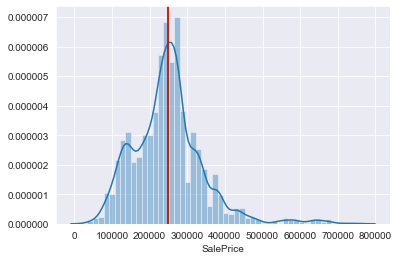

In [781]:
sns.distplot(X.SalePrice)
plt.axvline(X.SalePrice.median(), color = "green")
plt.axvline(X.SalePrice.mean(), color = "red")

In [782]:
import scipy
scipy.stats.skew(X.SalePrice)

1.1080378043765864

In [783]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler())
])

In [784]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("scaler", OneHotEncoder(handle_unknown = "ignore"))
])

In [785]:
numerical_features = X_train.select_dtypes(exclude = "object").columns
categorical_features = X_train.select_dtypes(include = "object").columns

In [786]:
from sklearn.compose import ColumnTransformer

data_transformer = ColumnTransformer(transformers = [
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)
])

In [787]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error

xgb_regressor = XGBRegressor()
rf_regressor = RandomForestRegressor()
et_regressor = ExtraTreesRegressor()
ab_regressor = AdaBoostRegressor()
gb_regressor = GradientBoostingRegressor()
svr = SVR()
en_regressor = ElasticNet()

regressors = [xgb_regressor, rf_regressor, et_regressor, ab_regressor, gb_regressor, svr, en_regressor]

for i in regressors:
    regressor = Pipeline(steps = [
    ("transformer", data_transformer),
    ("regressor", i)
    ])
    
    regressor.fit(X_train, y_train)
    pred_train = regressor.predict(X_train)
    pred_test = regressor.predict(X_test)
    
    print(i.__class__.__name__, "- train_RMSE%:", 100 * np.sqrt(mean_squared_error(y_train, pred_train) / y_train.mean()))
    print(i.__class__.__name__, "- test_RMSE%:", 100 * np.sqrt(mean_squared_error(y_test, pred_test) / y_test.mean()), "\n")
    

XGBRegressor - train_RMSE%: 458.768743440898
XGBRegressor - test_RMSE%: 2905.9120506340923 

RandomForestRegressor - train_RMSE%: 1495.638047658322
RandomForestRegressor - test_RMSE%: 4061.355896928635 

ExtraTreesRegressor - train_RMSE%: 1.120282640818179e-05
ExtraTreesRegressor - test_RMSE%: 3647.769004413532 

AdaBoostRegressor - train_RMSE%: 5582.685633831018
AdaBoostRegressor - test_RMSE%: 6432.485454466702 

GradientBoostingRegressor - train_RMSE%: 2809.2670073808945
GradientBoostingRegressor - test_RMSE%: 3396.4556589401986 

SVR - train_RMSE%: 18607.727095780476
SVR - test_RMSE%: 19392.653308683777 

ElasticNet - train_RMSE%: 5884.0817687083545
ElasticNet - test_RMSE%: 7623.295053915287 



In [798]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

xgb_regressor = XGBRegressor()

regressor = Pipeline(steps = [
    ("transformer", data_transformer),
    ("regressor", xgb_regressor)
    ])

In [799]:
from sklearn.model_selection import GridSearchCV


param_grid = {"regressor__learning_rate": np.linspace(0.001, 0.3, 5),
             "regressor__max_depth": np.arange(2, 8, 2),
             "regressor__n_estimators": [400, 450, 500, 550]}

grid_regressor = GridSearchCV(regressor, param_grid, cv = 3, n_jobs = -1)

grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Tota...
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
   

In [800]:
grid_regressor.best_params_

{'regressor__learning_rate': 0.07575,
 'regressor__max_depth': 6,
 'regressor__n_estimators': 550}

In [801]:
from sklearn.metrics import mean_squared_error

grid_regressor.best_estimator_.fit(X_train, y_train)

pred_train = grid_regressor.best_estimator_.predict(X_train)
print("Train score:",np.sqrt(mean_squared_error(np.log(y_train), np.log(pred_train))))

pred_test = grid_regressor.best_estimator_.predict(X_test)
print("Test score:", np.sqrt(mean_squared_error(np.log(y_test), np.log(pred_test))))

Train score: 0.00797560102225823
Test score: 0.08498345420034407


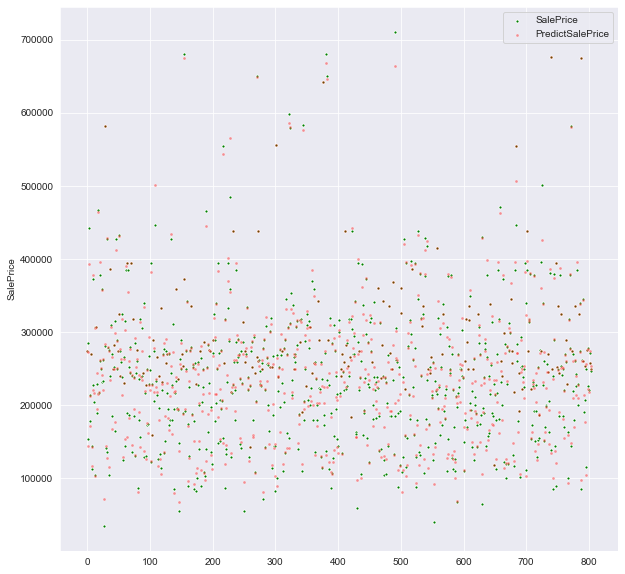

In [802]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = range(len(y_test)), y = y_test, color = "green", label = "SalePrice", marker = ".")

sns.scatterplot(x = range(len(pred_test)), y = pred_test, color = "red", label = "PredictSalePrice", marker = ".", alpha = 0.4)

[Text(0, 0.5, 'PredictedSalePrice')]

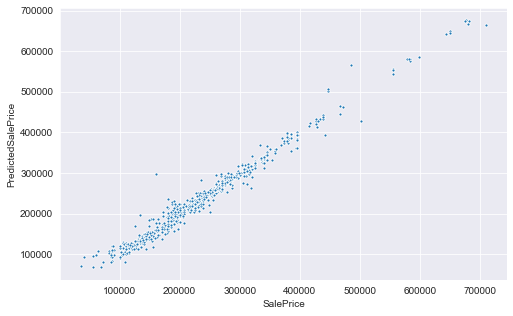

In [803]:
plt.figure(figsize = (8, 5))
sns.scatterplot(y_test, pred_test, marker = ".").set(ylabel = "PredictedSalePrice")

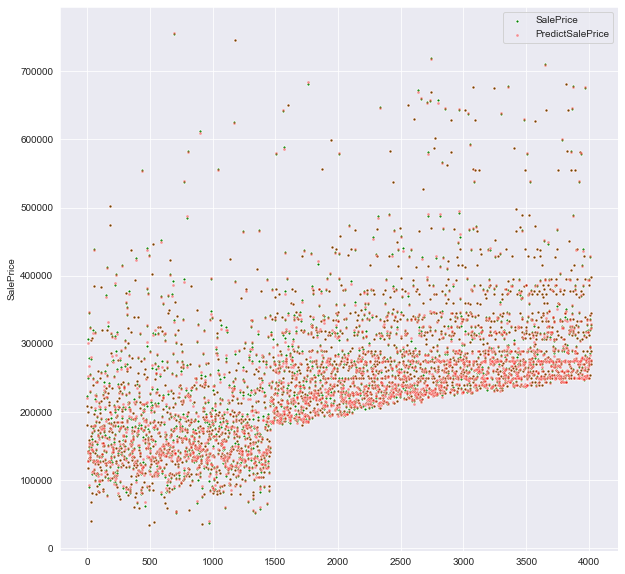

In [804]:
grid_regressor.best_estimator_.fit(X.drop(columns = "SalePrice"), X.SalePrice)

pred = grid_regressor.best_estimator_.predict(X.drop(columns = "SalePrice"))

plt.figure(figsize = (10, 10))
sns.scatterplot(x = range(len(X.SalePrice)), y = X.SalePrice, color = "green", label = "SalePrice", marker = ".")

sns.scatterplot(x = range(len(pred)), y = pred, color = "red", label = "PredictSalePrice", marker = ".", alpha = 0.4)

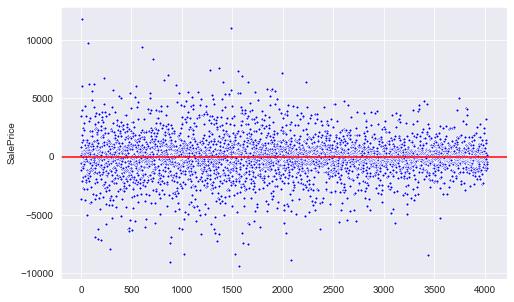

In [805]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = range(len(X.SalePrice)), y = X.SalePrice - pred, marker = ".", color = "blue")
plt.axhline(0, color = "red")

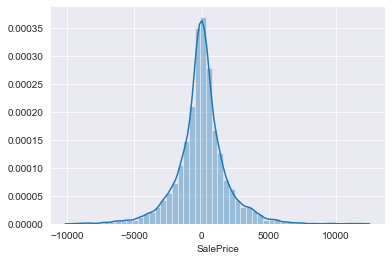

In [806]:
sns.distplot(X.SalePrice - pred)

In [807]:
resid = X.SalePrice - pred

X_clean = X.loc[(resid >= -6000) & (resid <= 6000),:]

In [808]:
from sklearn.model_selection import GridSearchCV

param_grid = {"regressor__learning_rate": np.linspace(0.001, 0.3, 5),
             "regressor__max_depth": np.arange(2, 8, 2),
             "regressor__n_estimators": [450, 500, 550],
             "regressor__alpha": np.linspace(0.001, 0.99, 5)}

grid_regressor = GridSearchCV(regressor, param_grid, cv = 3, n_jobs = -1)

grid_regressor.fit(X_clean.drop(columns = "SalePrice"), X_clean.SalePrice)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Tota...
                                                     reg_alpha=None,
                                                     reg_lambda=None,
       

In [809]:
grid_regressor.best_params_

{'regressor__alpha': 0.24825,
 'regressor__learning_rate': 0.07575,
 'regressor__max_depth': 6,
 'regressor__n_estimators': 550}

In [810]:
grid_regressor.best_estimator_.fit(X_clean.drop(columns = "SalePrice"), X_clean.SalePrice)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrS...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.07575,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
          

In [812]:
hp_test = pd.read_csv("house_prices_test.csv")
Id = hp_test.Id
hp_test = preprocessing(hp_test)
Saleprice = grid_regressor.best_estimator_.predict(hp_test)

hp_submission = pd.DataFrame({"Saleprice": Saleprice}, index = Id)

hp_submission.to_csv("hp_submission.csv")

hp_submission

C:\Users\wlamc\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


,Saleprice
Id,
1461,127777.046875
1462,161422.453125
1463,195708.781250
1464,197835.609375
1465,176113.562500
...,...
2915,85071.578125
2916,79351.085938
2917,163020.828125


# My final submission on kaggle is 0.13011